In [1]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/tracyhua2/DS3001/refs/heads/main/Data/NPHA-doctor-visits.csv"
df = pd.read_csv(url)
df.head()

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
0,3,2,4,3,3,3,0,0,0,0,1,2,3,1,2
1,2,2,4,2,3,3,1,0,0,1,0,3,3,1,1
2,3,2,3,2,3,3,0,0,0,0,1,3,3,4,1
3,1,2,3,2,3,3,0,0,0,1,0,3,3,4,2
4,3,2,3,3,3,3,1,0,0,0,0,2,3,1,2


In [3]:
# imputing NAs where survey is "Refused" or "Not Asked"
df_imputed = df.copy()

df_imputed['Trouble Sleeping'] = df_imputed['Trouble Sleeping'].fillna(-1)

df_imputed['Prescription Sleep Medication'] = (
    df_imputed['Prescription Sleep Medication']
      .fillna(-1)
)

df_imputed['Race'] = df_imputed['Race'].fillna(-2)
df_imputed['Race'] = df_imputed['Race'].fillna(-1)

df_imputed['Gender'] = df_imputed['Gender'].fillna(-2)
df_imputed['Gender'] = df_imputed['Gender'].fillna(-1)

df_imputed.isna().sum()

# this confirms that there are no NAs even when imputing where patients refused to answer
# or were never asked

Number of Doctors Visited                     0
Age                                           0
Phyiscal Health                               0
Mental Health                                 0
Dental Health                                 0
Employment                                    0
Stress Keeps Patient from Sleeping            0
Medication Keeps Patient from Sleeping        0
Pain Keeps Patient from Sleeping              0
Bathroom Needs Keeps Patient from Sleeping    0
Uknown Keeps Patient from Sleeping            0
Trouble Sleeping                              0
Prescription Sleep Medication                 0
Race                                          0
Gender                                        0
dtype: int64

In [4]:
# response variable is 'Number of Doctors Visited'
X = df.drop('Number of Doctors Visited', axis=1)
y = df['Number of Doctors Visited']

In [5]:
df.columns

Index(['Number of Doctors Visited', 'Age', 'Phyiscal Health', 'Mental Health',
       'Dental Health', 'Employment', 'Stress Keeps Patient from Sleeping',
       'Medication Keeps Patient from Sleeping',
       'Pain Keeps Patient from Sleeping',
       'Bathroom Needs Keeps Patient from Sleeping',
       'Uknown Keeps Patient from Sleeping', 'Trouble Sleeping',
       'Prescription Sleep Medication', 'Race', 'Gender'],
      dtype='object')

In [6]:
# drop 'Age' column because all data is 65-80 years old
df.drop(columns=['Age'])

,Number of Doctors Visited,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
0,3,4,3,3,3,0,0,0,0,1,2,3,1,2
1,2,4,2,3,3,1,0,0,1,0,3,3,1,1
2,3,3,2,3,3,0,0,0,0,1,3,3,4,1
3,1,3,2,3,3,0,0,0,1,0,3,3,4,2
4,3,3,3,3,3,1,0,0,0,0,2,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,2,2,2,2,3,0,0,0,1,0,3,3,1,1
710,3,2,2,2,2,1,0,0,0,1,2,3,1,2
711,3,4,2,3,3,0,0,0,0,0,3,3,1,1
712,3,3,1,3,3,1,0,1,1,1,3,3,1,2


In [7]:
# encode ordinal features using OrdinalEncoder
ordinal_features = ['Phyiscal Health','Mental Health','Dental Health',
                'Trouble Sleeping', 'Prescription Sleep Medication']

ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(df[ordinal_features])

df[ordinal_features] = ordinal_encoder.transform(df[ordinal_features])

# this doesn't do anything but reconfirms the ordinal nature of these features

In [8]:
# encode nominal features using OneHotEncoder using pd.get_dummies
nominal_features = ['Employment', 'Race']

df = pd.get_dummies(df, columns = nominal_features, drop_first=True, dtype=int)

df.head()

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Gender,Employment_2,Employment_3,Employment_4,Race_2,Race_3,Race_4,Race_5
0,3,2,4.0,3.0,3.0,0,0,0,0,1,2.0,3.0,2,0,1,0,0,0,0,0
1,2,2,4.0,2.0,3.0,1,0,0,1,0,3.0,3.0,1,0,1,0,0,0,0,0
2,3,2,3.0,2.0,3.0,0,0,0,0,1,3.0,3.0,1,0,1,0,0,0,1,0
3,1,2,3.0,2.0,3.0,0,0,0,1,0,3.0,3.0,2,0,1,0,0,0,1,0
4,3,2,3.0,3.0,3.0,1,0,0,0,0,2.0,3.0,2,0,1,0,0,0,0,0


In [9]:
# export data to csv for modeling
df.to_csv('encoded_data.csv', index=False)

Accuracy: 0.4405594405594406
Confusion Matrix:
 [[ 8 10  8]
 [20 32 23]
 [ 9 10 23]]
Classification Report:
               precision    recall  f1-score   support

           1       0.22      0.31      0.25        26
           2       0.62      0.43      0.50        75
           3       0.43      0.55      0.48        42

    accuracy                           0.44       143
   macro avg       0.42      0.43      0.41       143
weighted avg       0.49      0.44      0.45       143



<Figure size 600x500 with 0 Axes>

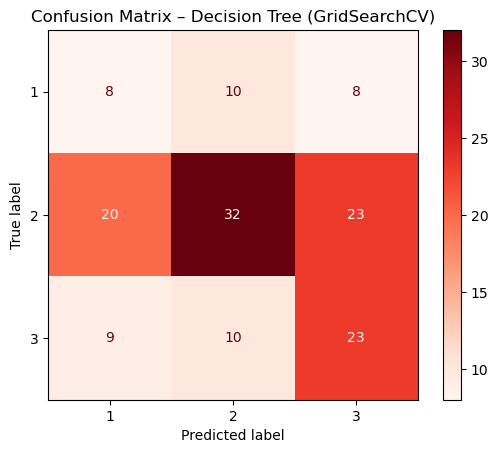

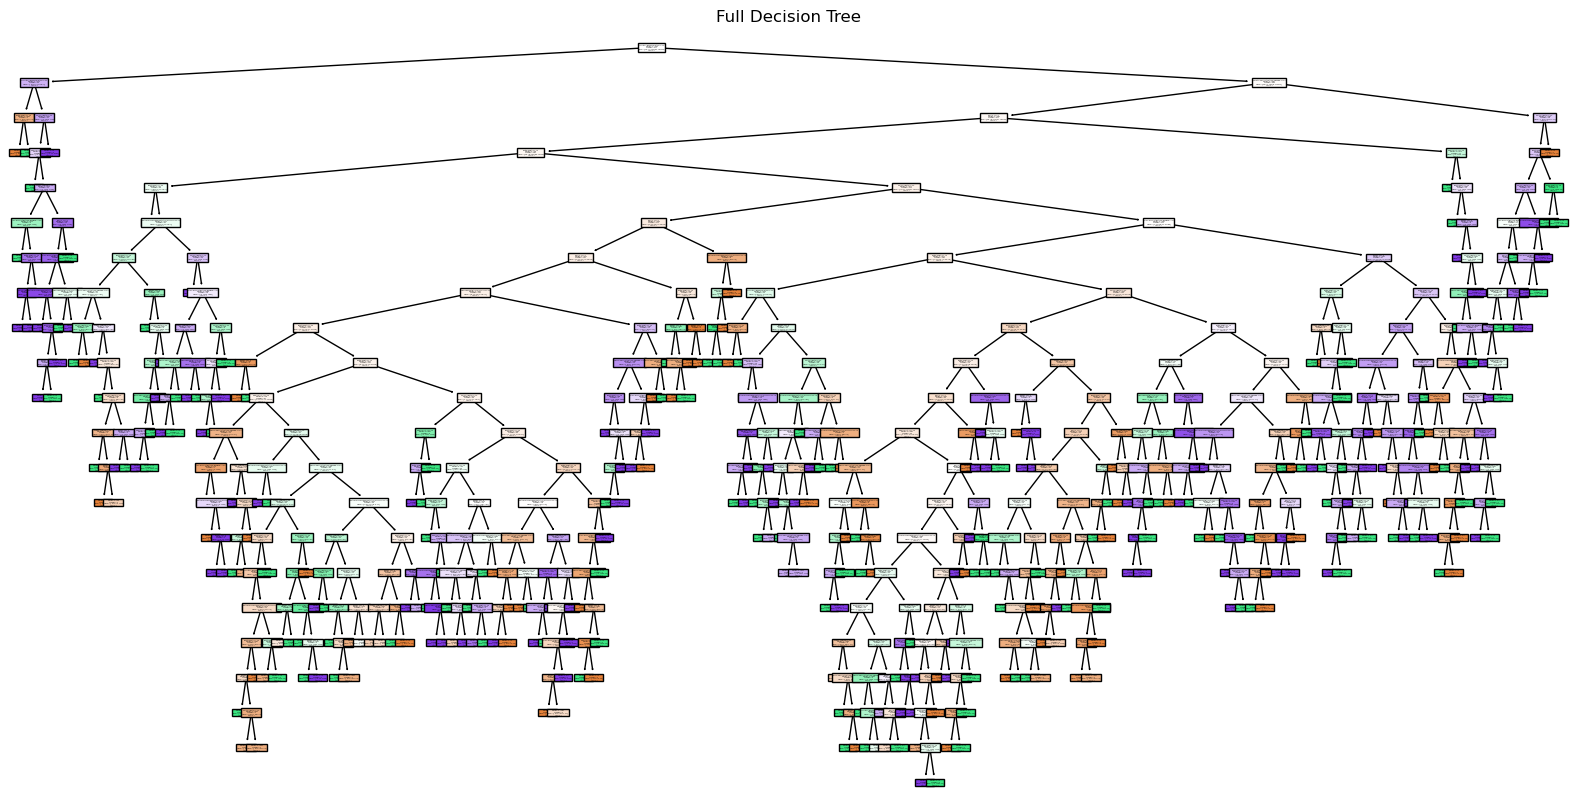

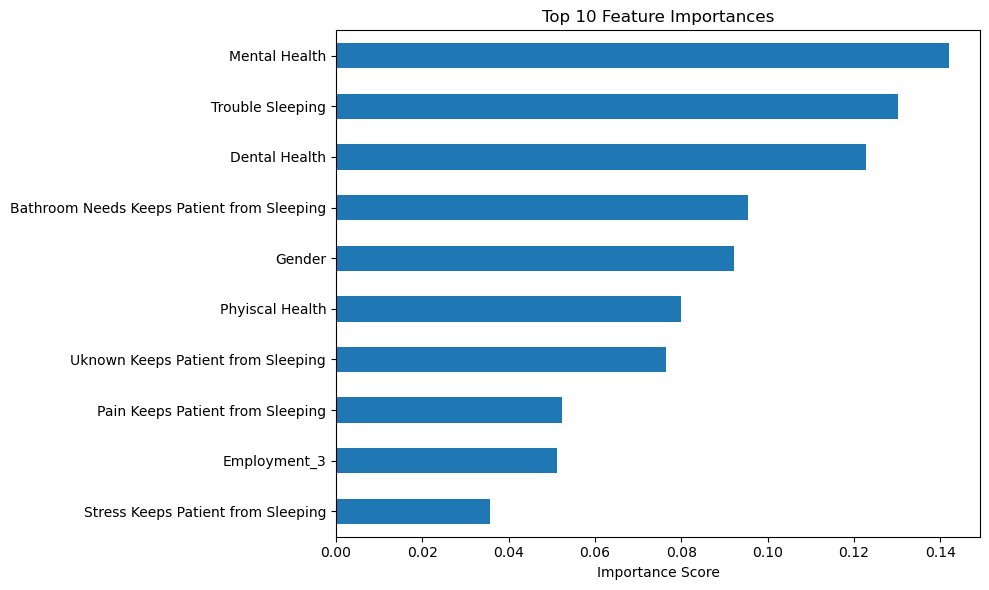

Text Version of Full Decision Tree:
|--- Prescription Sleep Medication <= 1.50
|   |--- Prescription Sleep Medication <= 0.50
|   |   |--- Dental Health <= 3.50
|   |   |   |--- class: 1
|   |   |--- Dental Health >  3.50
|   |   |   |--- class: 2
|   |--- Prescription Sleep Medication >  0.50
|   |   |--- Phyiscal Health <= 4.50
|   |   |   |--- Employment_3 <= 0.50
|   |   |   |   |--- class: 2
|   |   |   |--- Employment_3 >  0.50
|   |   |   |   |--- Trouble Sleeping <= 1.50
|   |   |   |   |   |--- Stress Keeps Patient from Sleeping <= 0.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- Stress Keeps Patient from Sleeping >  0.50
|   |   |   |   |   |   |--- Dental Health <= 3.00
|   |   |   |   |   |   |   |--- Phyiscal Health <= 2.50
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- Phyiscal Health >  2.50
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |--- Dental Health >  3.00
|   |   |   |   |   |   |   |--- c

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Define X and y
X = df.drop(columns=['Number of Doctors Visited'])
y = df['Number of Doctors Visited']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# GridSearchCV setup
param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced']
}
model = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(model, param_grid, cv=5, scoring='f1_weighted')
grid.fit(X_train, y_train)

# Evaluate
y_pred = grid.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix for already computed y_pred
plt.figure(figsize=(6, 5))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=grid.best_estimator_.classes_).plot(cmap=plt.cm.Reds, values_format='d')
plt.title("Confusion Matrix – Decision Tree (GridSearchCV)")
plt.show()

# Plot the full decision tree
plt.figure(figsize=(20, 10))
plot_tree(grid.best_estimator_, feature_names=X.columns, class_names=[str(c) for c in grid.best_estimator_.classes_], filled=True)
plt.title("Full Decision Tree")
plt.show()

# Top 10 feature importances
importances = pd.Series(grid.best_estimator_.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
importances.sort_values().plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# Text version of the tree
print("Text Version of Full Decision Tree:")
print(export_text(grid.best_estimator_, feature_names=list(X.columns))[:2000])



--- Shallow Tree Evaluation ---
Accuracy: 0.3916083916083916
Confusion Matrix:
 [[10 11  5]
 [34 34  7]
 [13 17 12]]
Classification Report:
               precision    recall  f1-score   support

           1       0.18      0.38      0.24        26
           2       0.55      0.45      0.50        75
           3       0.50      0.29      0.36        42

    accuracy                           0.39       143
   macro avg       0.41      0.37      0.37       143
weighted avg       0.47      0.39      0.41       143



<Figure size 600x500 with 0 Axes>

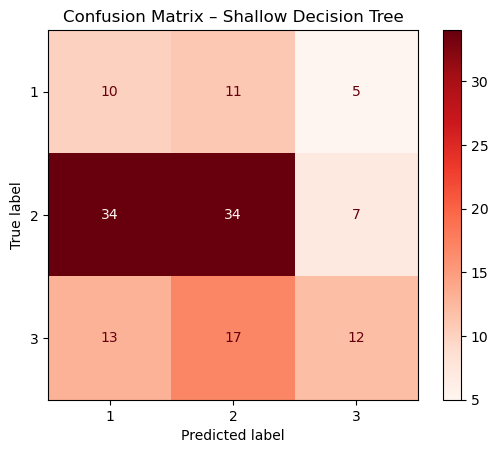

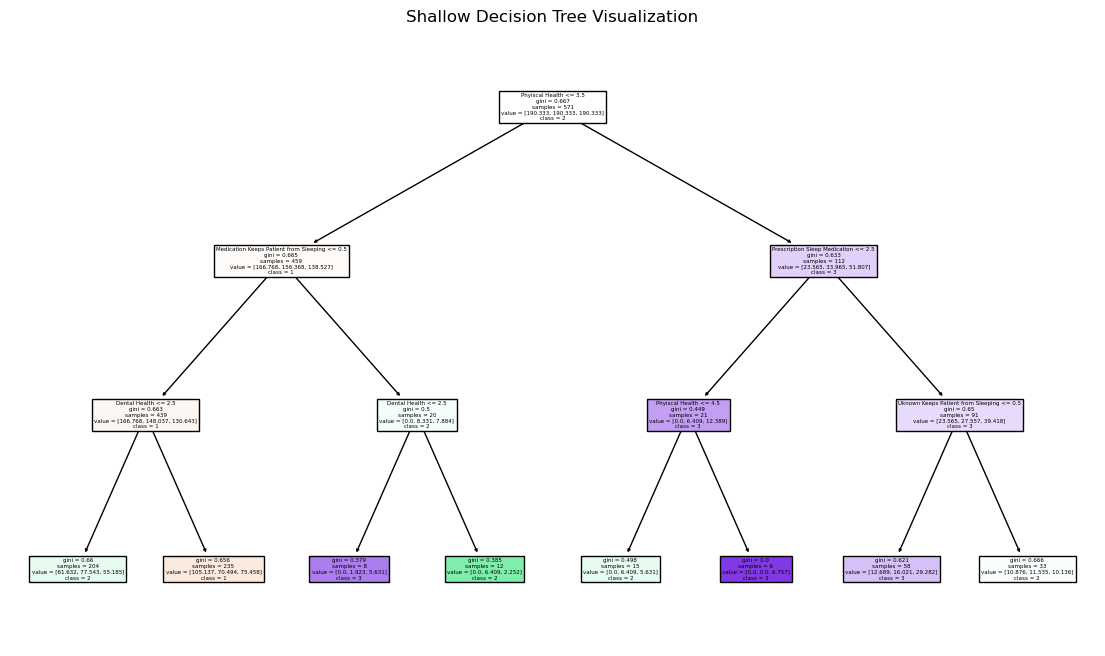

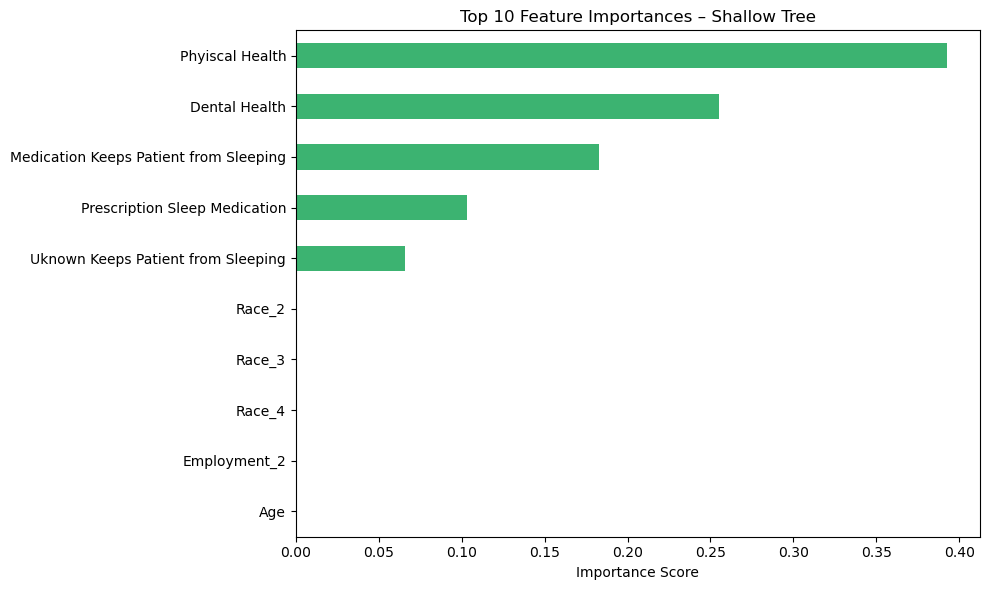

'|--- Phyiscal Health <= 3.50\n|   |--- Medication Keeps Patient from Sleeping <= 0.50\n|   |   |--- Dental Health <= 2.50\n|   |   |   |--- class: 2\n|   |   |--- Dental Health >  2.50\n|   |   |   |--- class: 1\n|   |--- Medication Keeps Patient from Sleeping >  0.50\n|   |   |--- Dental Health <= 2.50\n|   |   |   |--- class: 3\n|   |   |--- Dental Health >  2.50\n|   |   |   |--- class: 2\n|--- Phyiscal Health >  3.50\n|   |--- Prescription Sleep Medication <= 2.50\n|   |   |--- Phyiscal Health <= 4.50\n|   |   |   |--- class: 2\n|   |   |--- Phyiscal Health >  4.50\n|   |   |   |--- class: 3\n|   |--- Prescription Sleep Medication >  2.50\n|   |   |--- Uknown Keeps Patient from Sleeping <= 0.50\n|   |   |   |--- class: 3\n|   |   |--- Uknown Keeps Patient from Sleeping >  0.50\n|   |   |   |--- class: 2\n'

In [20]:
# Re-import necessary packages due to kernel reset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare features and target
X = df.drop(columns=['Number of Doctors Visited'])
y = df['Number of Doctors Visited']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Shallow tree configuration
shallow_tree = DecisionTreeClassifier(
    class_weight='balanced',
    max_depth=3,
    min_samples_split=5,
    min_samples_leaf=2,
    criterion='gini',
    random_state=42
)

# Train and predict
shallow_tree.fit(X_train, y_train)
y_pred_shallow = shallow_tree.predict(X_test)

# Evaluate shallow tree
print("\n--- Shallow Tree Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_shallow))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_shallow))
print("Classification Report:\n", classification_report(y_test, y_pred_shallow))

# Evaluate shallow tree
accuracy_shallow = accuracy_score(y_test, y_pred_shallow)
conf_matrix_shallow = confusion_matrix(y_test, y_pred_shallow)
class_report_shallow = classification_report(y_test, y_pred_shallow, output_dict=True)

# Get feature importances and tree rules
feature_importance_shallow = pd.Series(shallow_tree.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)
tree_text = export_text(shallow_tree, feature_names=list(X.columns), max_depth=3)

# Return key results for presentation
{
    "Accuracy": accuracy_shallow,
    "Confusion Matrix": conf_matrix_shallow,
    "Macro F1": class_report_shallow['macro avg']['f1-score'],
    "Weighted F1": class_report_shallow['weighted avg']['f1-score'],
    "Top Features": feature_importance_shallow,
    "Tree (Text Snippet)": tree_text[:1000]
}
# Confusion Matrix - Shallow Tree
plt.figure(figsize=(6, 5))
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_shallow, display_labels=shallow_tree.classes_).plot(cmap=plt.cm.Reds, values_format='d')
plt.title("Confusion Matrix – Shallow Decision Tree")
plt.show()

# Plot the full shallow tree
plt.figure(figsize=(14, 8))
plot_tree(shallow_tree, feature_names=X.columns, class_names=[str(c) for c in shallow_tree.classes_], filled=True)
plt.title("Shallow Decision Tree Visualization")
plt.show()

# Top 10 feature importances - Shallow Tree
plt.figure(figsize=(10, 6))
feature_importance_shallow.sort_values().plot(kind='barh', color='mediumseagreen')
plt.title("Top 10 Feature Importances – Shallow Tree")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# Text version snippet of the shallow tree
tree_text[:1000]